# Diabetes Detection 

In [186]:
import pandas as pd
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 


In [187]:
X=pd.read_csv("Diabetes_Detection/Training Data/Diabetes_XTrain.csv")
Y=pd.read_csv("Diabetes_Detection/Training Data/Diabetes_YTrain.csv")


# Training Set Inputs

In [188]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23
...,...,...,...,...,...,...,...,...
571,2,111,60,0,0,26.2,0.343,23
572,7,187,68,39,304,37.7,0.254,41
573,2,122,60,18,106,29.8,0.717,22
574,4,154,72,29,126,31.3,0.338,37


# Training Set Outcome 

In [189]:
Y.head(10)

,Outcome
0,1
1,0
2,1
3,1
4,0
5,1
6,0
7,0
8,1
9,0


# Importing Test Data

In [190]:
test_set=pd.read_csv("Diabetes_Detection/Test Cases/Diabetes_XTest.csv")

In [191]:
test_set.head()
test_set.shape

(192, 8)

In [192]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

# Feature Scaling using Sci Kit 

In [193]:
scaled_features=scaler.transform (X)

In [194]:
df_feat=pd.DataFrame(scaled_features,columns=X.columns)

In [195]:
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.974572,1.525281,0.945995,1.362427,2.244145,0.780366,0.907501,0.593634
1,1.275243,-0.316834,0.353934,-1.282400,-0.698144,-0.499183,-0.726400,2.110340
2,0.974572,0.858308,0.353934,-1.282400,-0.698144,0.928006,-0.666985,0.846418
3,-0.528785,-0.634440,-0.139449,-0.022959,0.126796,0.128288,1.145159,-0.417504
4,0.072558,0.286617,0.847318,-0.022959,1.776678,0.398962,-0.744224,-0.838811


In [196]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)

# Dividing the training set 

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=1)

In [199]:
knn.fit(xtrain,ytrain.values.ravel())

KNeighborsClassifier(n_neighbors=11)

In [200]:
ypred=knn.predict(xtest)
print(ypred)

[0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0]


In [201]:
ytest.values.T

array([[0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0]],
      dtype=int64)

In [202]:
knn.predict(test_set)

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [237]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [238]:
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80       114
           1       0.62      0.34      0.44        59

    accuracy                           0.71       173
   macro avg       0.67      0.62      0.62       173
weighted avg       0.69      0.71      0.68       173

[[102  12]
 [ 39  20]]


# Accuracy at n_neighbors =11

In [239]:
accuracy_score(ytest,ypred)

0.7052023121387283

# Finding optimum value of n_neighbors in range [1,40]

In [240]:
error_rate=[]
for i in range (1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain.values.ravel())
    pred_i=knn.predict(xtest)
    error_rate.append(np.mean(pred_i!=ytest.values.ravel()))


In [241]:
error_rate

[0.3583815028901734,
 0.3236994219653179,
 0.3583815028901734,
 0.3468208092485549,
 0.35260115606936415,
 0.32947976878612717,
 0.31213872832369943,
 0.3352601156069364,
 0.35260115606936415,
 0.34104046242774566,
 0.3236994219653179,
 0.3583815028901734,
 0.35260115606936415,
 0.35260115606936415,
 0.35260115606936415,
 0.3236994219653179,
 0.3063583815028902,
 0.30057803468208094,
 0.30057803468208094,
 0.34104046242774566,
 0.30057803468208094,
 0.3236994219653179,
 0.3179190751445087,
 0.2947976878612717,
 0.31213872832369943,
 0.3063583815028902,
 0.2947976878612717,
 0.2947976878612717,
 0.2774566473988439,
 0.2832369942196532,
 0.30057803468208094,
 0.2832369942196532,
 0.2947976878612717,
 0.3063583815028902,
 0.30057803468208094,
 0.3063583815028902,
 0.2832369942196532,
 0.2947976878612717,
 0.2832369942196532]

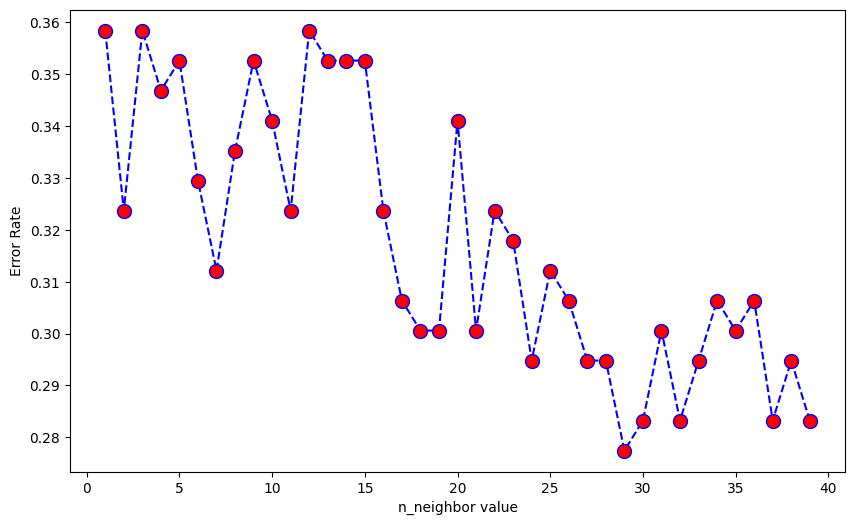

In [242]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='--',markersize=10,markerfacecolor='red',marker='o')
plt.xlabel('n_neighbor value')
plt.ylabel('Error Rate')
plt.show()

# Optimum value of n_neighbors

In [243]:
best_k_ar,=np.where(error_rate == np.min(error_rate))
best_k=best_k_ar[0]

In [244]:
knn=KNeighborsClassifier(n_neighbors=best_k)
xtest

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
261,6,80,66,30,0,26.2,0.313,41
547,0,106,70,37,148,39.4,0.605,22
267,8,188,78,0,0,47.9,0.137,43
541,2,90,80,14,55,24.4,0.249,24
460,4,109,64,44,99,34.8,0.905,26
...,...,...,...,...,...,...,...,...
110,8,196,76,29,280,37.5,0.605,57
363,11,103,68,40,0,46.2,0.126,42
293,1,144,82,46,180,46.1,0.335,46
315,2,155,52,27,540,38.7,0.240,25


In [245]:
knn.fit(xtrain,ytrain.values.ravel())

KNeighborsClassifier(n_neighbors=28)

In [246]:
ypred=knn.predict(xtest)
ypred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

# Accuracy at optimum n_neighbor value

In [247]:
accuracy_score(ytest,ypred)

0.7052023121387283

# Final outcome of Test Cases

In [249]:
outcome=knn.predict(test_set)

In [250]:
print(outcome)

[0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1
 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1
 0 1 0 0 1 0 0]


In [255]:
outcome_df=pd.DataFrame(outcome,columns=['Outcome'])
outcome_df

,Outcome
0,0
1,0
2,0
3,0
4,0
...,...
187,0
188,0
189,1
190,0


# Final Dataset

In [264]:
Test_Set_Results=pd.merge(test_set, outcome_df, left_index=True, right_index=True)

In [266]:
Test_Set_Results.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,180,90,26,90,36.5,0.314,35,0
1,2,93,64,32,160,38.0,0.674,23,0
2,2,114,68,22,0,28.7,0.092,25,0
3,13,76,60,0,0,32.8,0.180,41,0
4,1,80,74,11,60,30.0,0.527,22,0
5,5,137,108,0,0,48.8,0.227,37,0
6,1,153,82,42,485,40.6,0.687,23,1
7,6,98,58,33,190,34.0,0.430,43,0
8,2,92,62,28,0,31.6,0.130,24,0
9,3,111,56,39,0,30.1,0.557,30,0
